<H1>Line Plot</H1>
<p>Plots line plot of stat by team per week</p>

In [4]:
from espn_api.basketball import League
import matplotlib.pyplot as plt
league = League(league_id=LEAGUEID, year=2024, espn_s2='YOUR_ESPNS2CODE',swid='{SWID}'}

In [5]:
#Create dictionary
def create_dictionary(league):
    team_scores = {}
    for team in league.teams:
        team_scores[team.team_name] = {'PTS': [], 'BLK': [], 'STL': [], 'AST': [], 'REB': [], 'TO': [], 'FGM': [], 'FGA': [], 'FTM': [], 'FTA': [], '3PTM': [], 'FG%': [], 'FT%': []}
    
    for week in range(0,7):
        box = league.box_scores(week)
        for score in box:
            # Home team stats
            home_team_name = score.home_team.team_name
            for home_stat in team_scores[home_team_name]:
                team_scores[home_team_name][home_stat].append(score.home_stats[home_stat]['value'])
                # Away team stats
            away_team_name = score.away_team.team_name
            for away_stat in team_scores[away_team_name]:
                team_scores[away_team_name][away_stat].append(score.home_stats[away_stat]['value'])

    
    return team_scores

In [14]:
def plot_line_plot(stat, dictionary):
    team_scores = dictionary
    # Number of weeks
    weeks = list(range(1,(len(team_scores[list(league_dictionary)[0]][stat]))+1))
    # Plotting
    plt.figure(figsize=(10, 6))
    team_names = ["Team 1","Team 2","Team 3","Team 4","Team 5","Team 6","Team 7","Team 8"]
    i = 0
    for team in team_scores.keys():
        plt.plot(weeks, team_scores[team][stat], label=team_names[i], marker ='o')
        i += 1

    plt.xlabel('Week')
    plt.ylabel(stat)
    plt.title(f'Team {stat} by Week')
    plt.legend()  # This adds a legend
    plt.xticks(weeks)  # Assuming weeks are sequential and start from 1
    plt.show()

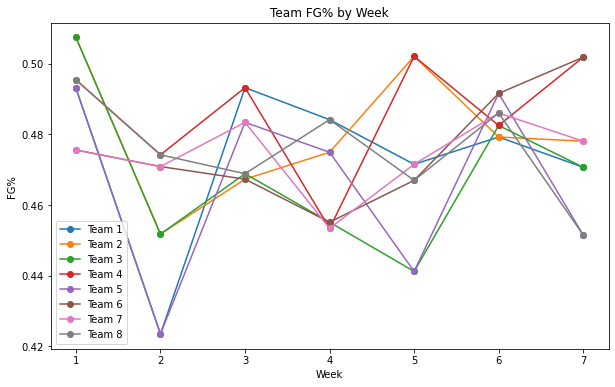

In [15]:

#Uncomment the below command to laod library once, then commment it out
#league_dictionary = create_dictionary(league)
plot_line_plot("FG%",league_dictionary)